# Notebook created to study the book from O'Reilly: [LINK](https://learning.oreilly.com/library/view/introduction-to-machine/9781449369880/ch01.html#jupyter-notebook)

In [ ]:
pip install numpy scipy matplotlib ipython scikit-learn pandas pillow

In [7]:
import numpy as np

x = np.array([[1,2,3],[5,6,7]])

print("x:\n{}".format(x))

x:
[[1 2 3]
 [5 6 7]]


## ¿Cómo se utiliza el comando .format?:

Es un comando para asignar variables dentro del print, con la posibilidad de alterar la forma en la que se imprimen. Por ejemplo:

In [8]:
print('Mi nombre es {}'.format('Jonny'))

Mi nombre es Jonny


In [11]:
# También se puede utilizar para dar formato a los números que se presentan. Por ejemplo:
valor = 3.5624
print('El número valor, con solo dos decimales se vería así {:.2f}'.format(valor))

El número valor, con solo dos decimales se vería así 3.56


In [12]:
# O para formatear fechas, se vería así:

from datetime import datetime
date = datetime.now()
print("La fecha actual es {}".format(date.strftime("%d/%m/%Y")))

La fecha actual es 12/04/2024


In [13]:
# También es posible asignar nombres a las variables:

print('El animal era un {animal} de ojos color {color}'.format(animal='Oso', color='verdes'))

El animal era un Oso de ojos color verdes


# Create a Dataframe with Pandas:

In [15]:
data = {'Nombres': ['Juan','Adriana'],
        'Edad': [12,20]
}

In [17]:
import pandas as pd
df = pd.DataFrame(data)

In [18]:
df

,Nombres,Edad
0,Juan,12
1,Adriana,20


# Using "mglearn" to get databases used in the book:

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# First use of ML:

Classification of flowers of the iris dataset:

In [20]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [27]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [43]:
print(iris_dataset['DESCR'][:200])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive


In [44]:
# Target names:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [45]:
# Feature names:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [46]:
# Type of data:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [49]:
# Shape of data:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [55]:
# First five rows of data:
print('The firts 5 rows of data are:\n', iris_dataset['data'][:5])

The firts 5 rows of data are:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [57]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [62]:
iris_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# Separate data between train and test:


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.2,
                                                    random_state=42)

In [59]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


In [60]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (30, 4)
y_test shape: (30,)


## Create a Dataframe to make easier the creation of graphics:


In [64]:
df = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.6,3.6,1.0,0.2
1,5.7,4.4,1.5,0.4


array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

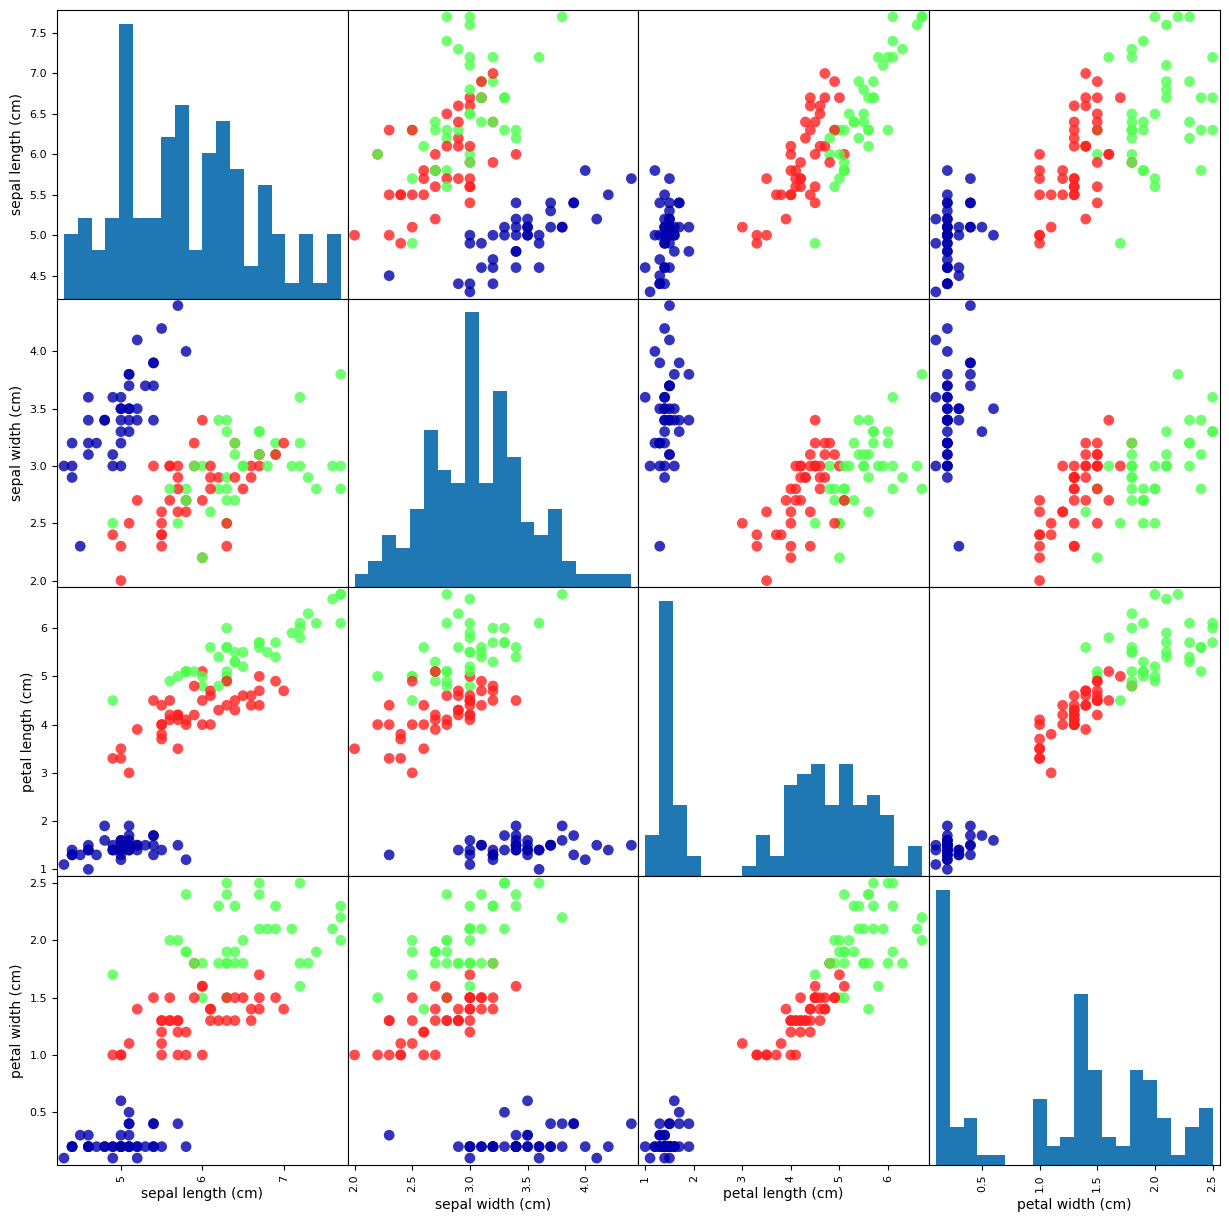

In [65]:
pd.plotting.scatter_matrix(df, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

## Creation of the algorithm use for prediction:

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [81]:
new_prediction = knn.predict(X_new)
new_prediction

array([0])

In [82]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

Prediction: [0]
Predicted target name: ['setosa']


# Evaluate the model:

In [83]:
y_pred = knn.predict(X_test)
accuracy = np.mean(y_test == y_pred)

In [86]:
print('The accuracy of the model over test dataset is {:.2f}'.format(accuracy))

The accuracy of the model over test dataset is 1.00


In [88]:
y_proba = knn.predict_proba(X_test)
y_proba[:5]

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [89]:
df_proba = pd.DataFrame(y_proba, columns=iris_dataset['target_names'])

In [90]:
df_proba.head(2)

,setosa,versicolor,virginica
0,0.0,1.0,0.0
1,1.0,0.0,0.0


c:\Users\USER\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


array([[<Axes: xlabel='setosa', ylabel='setosa'>,
        <Axes: xlabel='versicolor', ylabel='setosa'>,
        <Axes: xlabel='virginica', ylabel='setosa'>],
       [<Axes: xlabel='setosa', ylabel='versicolor'>,
        <Axes: xlabel='versicolor', ylabel='versicolor'>,
        <Axes: xlabel='virginica', ylabel='versicolor'>],
       [<Axes: xlabel='setosa', ylabel='virginica'>,
        <Axes: xlabel='versicolor', ylabel='virginica'>,
        <Axes: xlabel='virginica', ylabel='virginica'>]], dtype=object)

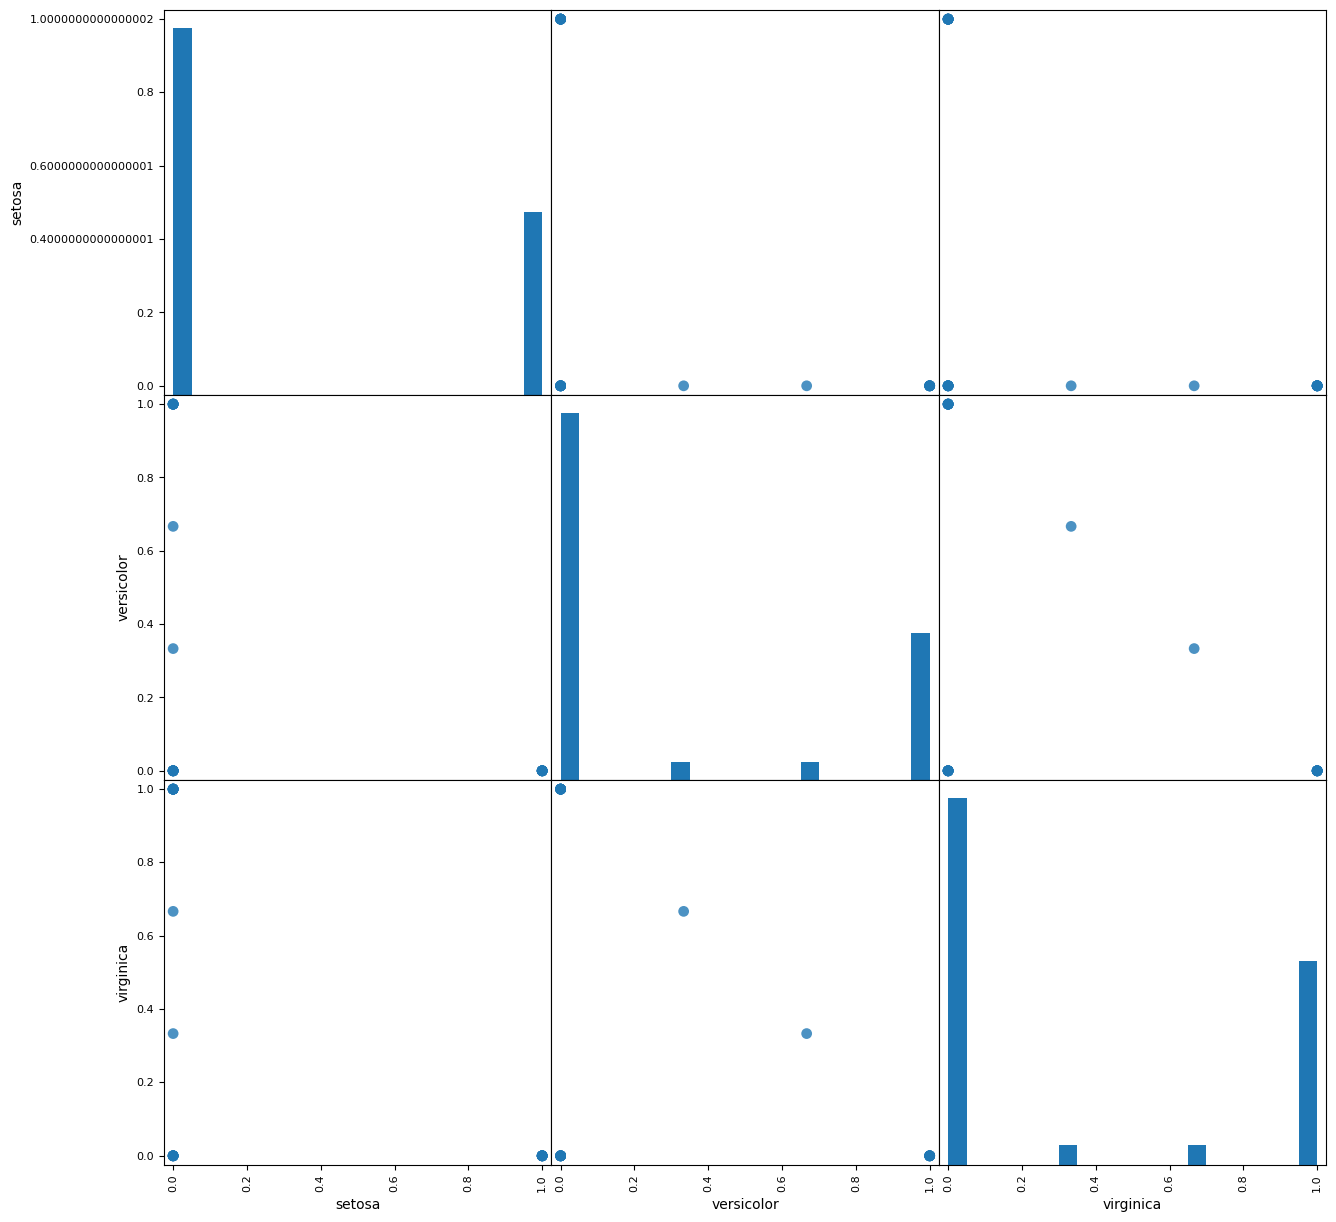

In [93]:
pd.plotting.scatter_matrix(df_proba, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)